# Project 1

[This dataset](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Proj1.csv) is adapted from the World Health Organization on Strokes (it's based on real data but is NOT REAL). Use this dataset to answer the following questions and perform the following tasks. Feel free to add extra cells as needed, but <strong>clearly identify where each question is answered, both the code and Markdown cells</strong>. Please remove any superflous code. Please put any written/typed responses in MARKDOWN CELLS.

## Data Information

- `reg_to_vote`: 0 if no, 1 if yes.
- `age`: age of the patient in years.
- `hypertension`: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.
- `heart_disease`: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.
- `ever_married`: 0 if no, 1 if yes.
- `Residence_type`: 0 for Rural, 1 for Urban.
- `avg_glucose_level`: average glucose level in blood.
- `bmi`: body mass index.
- `smoking_status_smokes`, `smoking_status_formerly`: Whether or not the person smokes, or formerly smoked. If a person has 0's for both these columns, they never smoked.
- `stroke`: 1 if the patient had a stroke or 0 if not.
- `dog_owner`: 0 if no, 1 if yes.
- `income_in_k`: income in thousands
- `er_visits`: number of recorded Emergency Room visits in lifetime.
- `raccoons_to_fight`: number of racoons the patient belives they could fight off at once.
- `fast_food_budget_month`: amount (in US dollars) spent on fast food per month.


## Part I: Logistic Regression
Build a logistic regression model to predict whether or not someone had a `stroke` based on **all** the other variables in the dataset.

1. Count the missing data per column, and remove rows with missing data (if any).
2. Use 10 fold cross validation for your model validation. Z-score your continuous/interval variables only. Store both the train and test accuracies to check for overfitting. **Is the model overfit? How can you tell?**
3. After completing steps 1-2, fit another logistic regression model on ALL of the data (no model validation; but do z score) using the same predictors as before, and put the coefficients into a dataframe called `coef`.
4. print out a confusion matrix for the model you made in part 3. **What does this confusion matrix tell you about your model? How can you tell?**

## Part II: Data Exploration
The WHO has asked the following five questions, create **at least 1 ggplot graph per question** (using the above data + model when needed) to help answer each question, and **explicitly answer the question in a Markdown cell** below your graph. You may use other calculations to help support your answer but MUST pair it with a graph. Write your answer as if you were explaining it to a non-data scientist. You will be graded on the effectiveness and clarity of your graph, as well as the completeness, clarity, and correctness of your responses and justifications.

1. In this specific data set, do dog-owners over 50 have a higher average probability of stoke than non-dog owners who currently smoke? How can you tell? (Do not use the model for this question, it's asking you to compare the observed probability of having a stroke in the two groups described).
2. What is the relationship between average blood glucose and BMI? Is the relationship between those two variables different for people who are and are not registered to vote? How can you tell?
3. Is your logistic regression model most accurate for people who make less than 30k, between 30-90k, or over 90k? Discuss the potential accuracy *and* ethical implications if your model *were* more accurate for different groups (you can use the full model from part I-3 to check accuracy for each of these groups; DO NOT create/fit new models for each income range, use the model from part I-3 to calculate the accuracy for each of these groups.)
4. Which of the following variables is the strongest predictor of having a stroke (owning a dog, residence type, marriage, being registered to vote)? How were you able to tell?
5. Create a variable `er_visits_per_year` that calculates the # of visits to the ER that a person has had per year of life. Store this variable in your data frame (no need to include this variable in the previous logistic regression model). Is the # of ER visits per year different for stroke and non-stroke patients? How can you tell?

In [ ]:
#import statements
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix ,plot_confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #model evaluation

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Proj1.csv")
print("Number of empty items per column: ")
print(df.isnull().sum())
df = df.dropna()
print("Dropped all null items in the dataset!!!!")

df = df.reset_index()

Number of empty items per column: 
age                         13
hypertension                12
heart_disease               21
ever_married                 9
Residence_type              21
avg_glucose_level           31
bmi                        575
stroke                       0
smoking_status_smokes        0
smoking_status_formerly      0
reg_to_vote                 14
dog_owner                   21
raccoons_to_fight           27
fast_food_budget_month       8
income_in_k                 21
er_visits                   15
dtype: int64
Dropped all null items in the dataset!!!!


In [ ]:
predictors = ["reg_to_vote", "age", "hypertension", "heart_disease", "ever_married", "Residence_type", "avg_glucose_level", "bmi", "smoking_status_smokes", "smoking_status_formerly", "dog_owner", "income_in_k", "er_visits", "raccoons_to_fight", "fast_food_budget_month"]
cont =  ["age", "avg_glucose_level", "bmi", "raccoons_to_fight", "fast_food_budget_month", "income_in_k", "er_visits"]

X = df[predictors]
y = df["stroke"]


In [ ]:
#begin KF set-up
kf = KFold(n_splits = 10)
kf.split(X)

lr = LogisticRegression(penalty = "none")

#accuracy scores for train and test
acc_test = []
acc_train = []


In [ ]:
#conduct KFold validation
for train_indices, test_indices in kf.split(X):
  X_train = X.iloc[train_indices]
  X_test  = X.iloc[test_indices]
  y_train = y[train_indices]
  y_test  = y[test_indices]

  # z score
  z = StandardScaler()
  X_train[cont] = z.fit_transform(X_train[cont])
  X_test[cont]  = z.transform(X_test[cont])
  
  # model
  model = lr.fit(X_train, y_train)
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  #accuracy score updating
  acc_test.append(accuracy_score(y_test, y_pred_test))
  acc_train.append(accuracy_score(y_train, y_pred_train))
  


In [ ]:
print("Accuracy scores for the testing folds: ", np.mean(acc_test))
print("Accuracy scores for the training folds: ", np.mean(acc_train))



Accuracy scores for the testing folds:  0.9602734066516234
Accuracy scores for the training folds:  0.9604681377695522


**<h1>2. Is the model overfit? How can you tell? </h1>**

The accuracy scores for both the testing and training sets have a negligble difference such that we can confidently determine that our model is not overfit. The difference, in accuracy, between both sets is less than 0.0002 which isn't enough reasoning to clearly declare the model as overfit.

**<h1>3. After completing steps 1-2, fit another logistic regression model on ALL of the data (no model validation; but do z score) using the same predictors as before, and put the coefficients into a dataframe called coef. </h1>**

In [ ]:
# model
myLogit = LogisticRegression(penalty = "none")


# fit
z = StandardScaler()
X[cont] = z.fit_transform(X[cont])
myLogit.fit(X, y)

coef = pd.DataFrame({"Coefs": predictors, "logOdds": myLogit.coef_[0],
                    "Odds": np.exp(myLogit.coef_[0])})
coef

,Coefs,logOdds,Odds
0,reg_to_vote,-0.060479,0.941314
1,age,1.623984,5.073263
2,hypertension,0.250496,1.284663
3,heart_disease,0.425367,1.530152
4,ever_married,-0.195331,0.822563
5,Residence_type,-0.020590,0.979620
6,avg_glucose_level,0.242319,1.274200
7,bmi,0.113410,1.120091
8,smoking_status_smokes,0.300694,1.350795
9,smoking_status_formerly,0.147751,1.159225


Text(0.5, 1.0, 'Confusion matrix of the classifier')

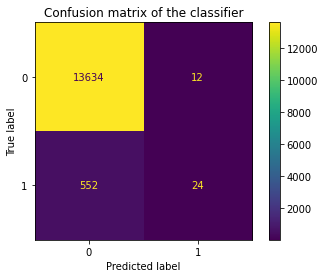

In [ ]:
plot_confusion_matrix(myLogit, X, y)
plt.title('Confusion matrix of the classifier')

**<h1> 4. What does this confusion matrix tell you about your model? How can you tell? </h1>**

This confusion matrix indicates that the model was excellent at correctly predicting people who wouldn't get a stroke based on the predictors we used for the model. Moreover, it shows that the model wasn't perfect. The diagonal presenting incorrect predctions indicates the inaccuracy of the model. Especially in the context of something as predicting a stroke innaccuracies are intolerable because that could mean life, death, or severe bodily damage. It is extremely concerning that the model predicted 552 people wouldn't get a stroke when they actually did. Overall, the matrix does indicate that majority of the predicted values were the correct predictions; however, the fact that there are values in the diagonal representing inaccurate predictions indicates that the model isn't completley trustworthy/accruate. In the context of our dataset and what we are predicting that is noteworthy because of the serious implications an innacurate prediction could have on someone's life. 

**<h1> PART II: DATA EXPLORATION </h1>**

<h3> Question 1: In this specific data set, do dog-owners over 50 have a higher average probability of stoke than non-dog owners who currently smoke? How can you tell? (Do not use the model for this question, it's asking you to compare the observed probability of having a stroke in the two groups described). </h3>

In [ ]:
#use the proba function


#setup graph for dog owners over fifty
dog_owner_fifty = df.loc[(df["age"] > 50) & (df["dog_owner"] == 1)]

plotDogOwnerFifty =  pd.DataFrame({"Stroke Tendency": ["No Stroke", "Stroke"],
                                   "Count": [(dog_owner_fifty.loc[dog_owner_fifty["stroke"] == 0]).shape[0],
                                            (dog_owner_fifty.loc[dog_owner_fifty["stroke"] == 1]).shape[0]]})



#setup Graph for Non Dog Owners who Smoke
no_dog_smokers = df.loc[(df["smoking_status_smokes"] == 1) & (df["dog_owner"] == 0)]

plotDogSmokers = pd.DataFrame({"Stroke Tendency": ["No Stroke", "Stroke"],
                               "Count": [(no_dog_smokers.loc[no_dog_smokers["stroke"] == 0]).shape[0],
                                         (no_dog_smokers.loc[no_dog_smokers["stroke"] == 1]).shape[0]]})



In [ ]:
#finding probabilities for dog owners over the age of 50
z = StandardScaler()

Xnew = dog_owner_fifty.iloc[:, [j for j in range(0, len(list(dog_owner_fifty))) if list(dog_owner_fifty)[j] in predictors]]
Xnewz = z.fit_transform(Xnew)


Ypred_proba = myLogit.predict_proba(Xnewz)
Ypred_proba

probaTotal1 = 0
for i in Ypred_proba:
  probaTotal1 += i[1];

probaTotal1 /= Ypred_proba.shape[0]



In [ ]:
#finding probabilities for non dog owners who smoke
z = StandardScaler()

Xnew = no_dog_smokers.iloc[:, [j for j in range(0, len(list(no_dog_smokers))) if list(no_dog_smokers)[j] in predictors]]
Xnewz = z.fit_transform(Xnew)


Ypred_proba = myLogit.predict_proba(Xnewz)
Ypred_proba

probaTotal2 = 0
for i in Ypred_proba:
  probaTotal2 += i[1];

probaTotal2 /= Ypred_proba.shape[0]


Average Probability for dog owners over the age of 50 having a stroke is:  6.045723261814413


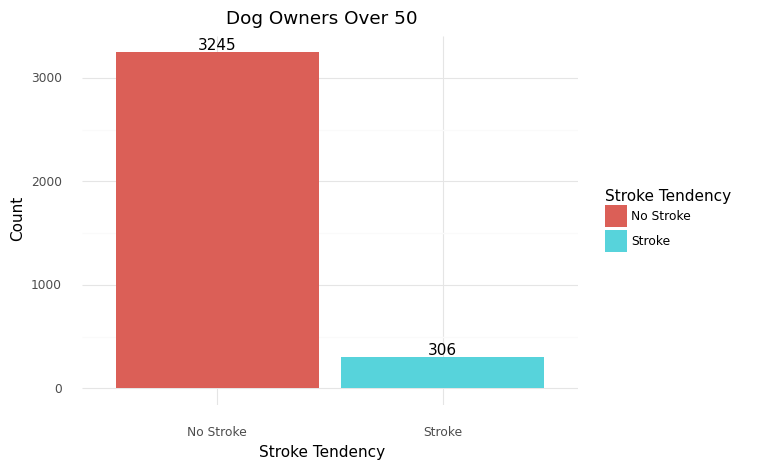

<ggplot: (8790804909505)>
Average Probability for non dog owners who smoke having a stroke is:  7.549675759992702


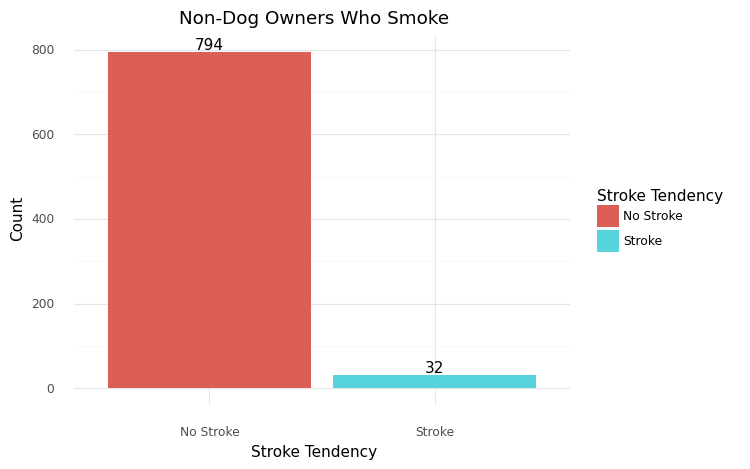

<ggplot: (8790805274325)>


In [ ]:

#average of probabilities for having a stroke
print("Average Probability for dog owners over the age of 50 having a stroke is: ", probaTotal1 * 100)
#graph
print(ggplot(plotDogOwnerFifty, aes(x = "Stroke Tendency", y = "Count", fill = "Stroke Tendency" )) + labs(title = "Dog Owners Over 50") + 
 geom_bar(stat = "identity") + theme_minimal() + geom_text(aes(label="Count"), vjust = "bottom"))


#average of probabilities for having a stroke
print("Average Probability for non dog owners who smoke having a stroke is: ", probaTotal2 * 100)
#graph
print(ggplot(plotDogSmokers, aes(x = "Stroke Tendency", y = "Count", fill = "Stroke Tendency" )) + labs(title = "Non-Dog Owners Who Smoke") + 
 geom_bar(stat = "identity") + theme_minimal() + geom_text(aes(label="Count"), vjust = "bottom"))



Explaintion: 

The average probability of non-dog owners who smoke is higher than the probability of dog owners above the age of 50. We can tell this information based on the probability variable we calculated. Furthermore, the graph indicates that a higher proportion of non-dog owners who smoke having a stroke than it does for dog owners above the age of 50. The key indicator to determine which group has the higher probability is based on the probability value we found. 

**<h2>2. What is the relationship between average blood glucose and BMI? Is the relationship between those two variables different for people who are and are not registered to vote? How can you tell?</h2>**

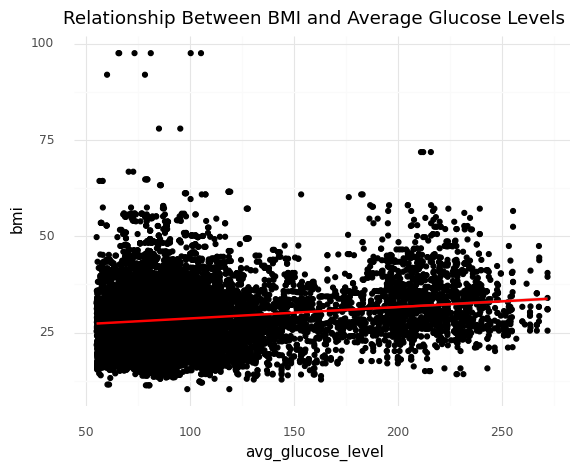

<ggplot: (8790805270649)>


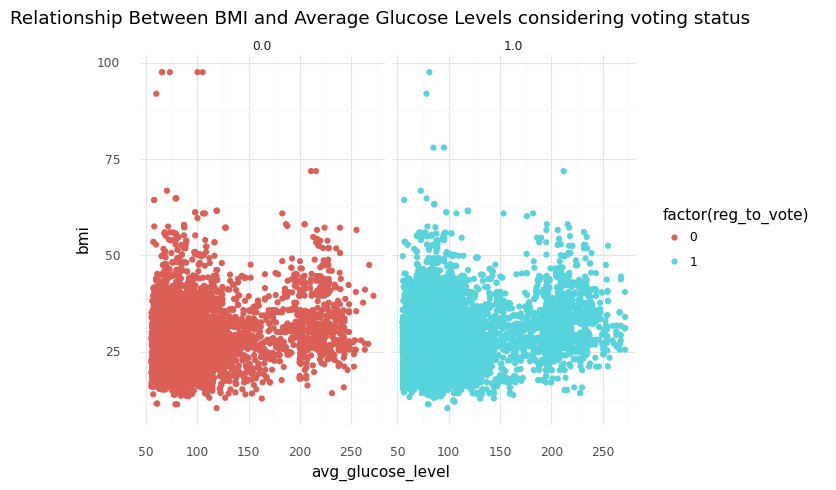

<ggplot: (8790805276901)>


In [ ]:
print(ggplot(df, aes(x = "avg_glucose_level", y = "bmi")) + geom_point() + theme_minimal() + geom_smooth(method = "lm", color = "red") + labs(title = "Relationship Between BMI and Average Glucose Levels"))
print(ggplot(df, aes(x = "avg_glucose_level", y = "bmi", color = "factor(reg_to_vote)")) + geom_point() + theme_minimal() + facet_wrap("reg_to_vote") + labs(title = "Relationship Between BMI and Average Glucose Levels considering voting status"))

Explaination: 

The relationship between BMI and Glucose levels, as indicated by the first graph, has a positive linear relationship. As glucose levels increase BMI also increases. However, when we analyze how voting status affects this relationship we see that there is no difference in the pattern for both types of status (those who are registered to vote and those who are not registered to vote). Thus, voting doesn't impact the postive linear relationship we see in the first graph. 

**<h2> 3. Is your logistic regression model most accurate for people who make less than 30k, between 30-90k, or over 90k? Discuss the potential accuracy and ethical implications if your model were more accurate for different groups (you can use the full model from part I-3 to check accuracy for each of these groups; DO NOT create/fit new models for each income range, use the model from part I-3 to calculate the accuracy for each of these groups.)</h2>**


Salary Range: LESS THAN 30k
Accuracy score for this graph:  1.0


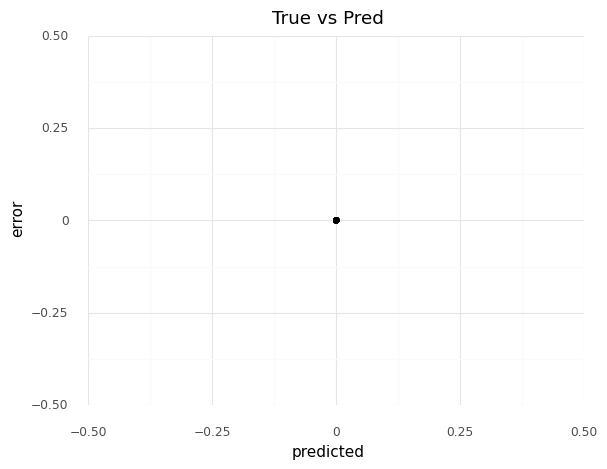

<ggplot: (8790805274473)>

Salary Range: BETWEEN 30k - 90k
Accuracy score for this graph:  0.9612298259850329


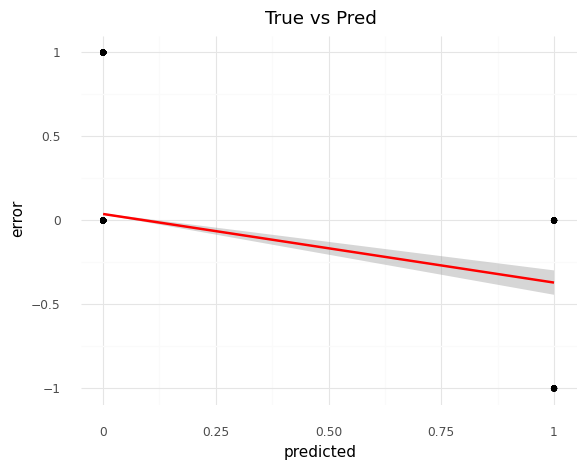

<ggplot: (8790804905321)>

Salary Range: MORE THAN 90k
Accuracy score for this graph:  0.9540428472702143


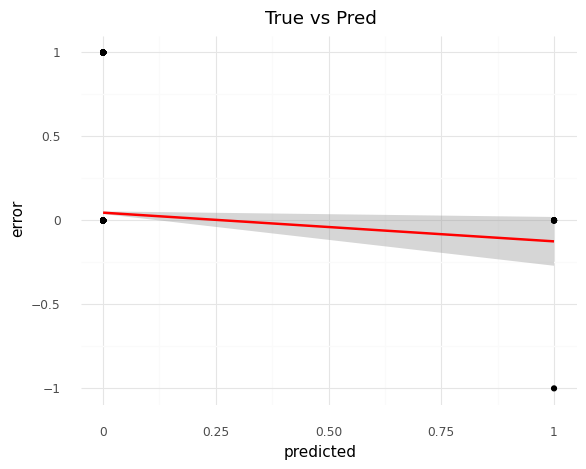

<ggplot: (8790807746233)>


In [ ]:
salUnder30 = df.loc[df["income_in_k"] < 30]
salBetween30and90 = df.loc[(df["income_in_k"] >= 30) & (df["income_in_k"] <= 90)]
salOver90 = df.loc[df["income_in_k"] > 90]

zscore = StandardScaler()

def incomeBasedPred(name):
  name[cont] = zscore.fit_transform(name[cont])
  y_pred = myLogit.predict(name[predictors])
  y_actual = name["stroke"]
  assump = pd.DataFrame({"error": y_actual - y_pred, "predicted": y_pred})
  print("Accuracy score for this graph: ", accuracy_score(y_actual, y_pred))
  print(ggplot(assump, aes(x = "predicted", y = "error")) + 
        geom_smooth(method = "lm", color = "red")
        + labs(title = "True vs Pred" )
        + geom_point() + theme_minimal())


print("\nSalary Range: LESS THAN 30k")
incomeBasedPred(salUnder30)
print("\nSalary Range: BETWEEN 30k - 90k")
incomeBasedPred(salBetween30and90)
print("\nSalary Range: MORE THAN 90k")
incomeBasedPred(salOver90)

Explaination: 

My logistic model was the most accurate for those who make under 30k. The graph for this had all the points at 0 which basically meant that every point matched up with the true value thus it has a 100% accuracy. The accuracy score for this range also confirmed the same thing. However, this number might not mean a lot when we consider the context of income and the value of money itselft. This is explored in the next portion of the response dedicated to accuracy and ethical implications. 

If the model was more accurate for different models then there could be different interpretations as to why that is the case.

Case 1: If the model was more accurate for those with an income that is between 30-90k. There would be some ethical implications. Based on their income range, this group has more access to medical care and the ability to go to the ER as well as other emergency points of care. This leads to an increase in transparency of the condition of the patient and more clarity as to whether or not they had a stroke. Thus, the reporting of this group could lead a lifestyle that helps the model predict more accurately. 

Case 2: If the model was more accurate for those making more than 90k. The accuracy implications is attributed to the same things discussed in Case 1. The only difference is that group might have more medical access compared to those making 30k-90k. Essentially, this group could get opinions from multiple doctors as to what their emergency condition was and how they should preemetively notice and take care of those issues. This group makes the most amount of money which means that, if necessary, they can maximize the medical system to fully understand what happened that led to the stroke or what might lead to a stroke. Thus, if this group had the highest accuracy rates that could be because they have the money to increased access to the medical system and lead a lifestyle that influences the model to predict more accurately.

Case 3: My model was the most accurate for those making less than 30k. This was kind of weird to see. I expected that the more money someone made the more likely it would be that the model predicted accurately. After analazying what might cause this I ended up with a few questions. Is this group educated enough to notice stroke symptoms? Do they have access to proper medical services to get to the ER and have doctors explain what the condition is? While it is great to see that the model predicted accurately for this group it was extremly odd especially when we see how income and medical care is intertwined (those who live in low income areas or government housing neighborhoods will not have the same lifestyle and access to medical care as those who live in urban/suburban areas with the disposable income to have good medicare). 


OVERALL: Social context plays a huge role when coupled with income. It is important to understand how income affects lifestyles and how that could lead to inaccuracies when it comes to reporting because some people may not be educated enough to convey that they were a stroke victim even if they could've been classified as such. Income alone is not a solid indicator, we must take other predictors into context to best estimate the outcome. Ethically, we must understand that income does affect quality of life (whether that is good or bad depends); thus, money isn't a good way to help predict whether someone will have a stroke. 


**<h2>4. Which of the following variables is the strongest predictor of having a stroke (owning a dog, residence type, marriage, being registered to vote)? How were you able to tell?</h2>**

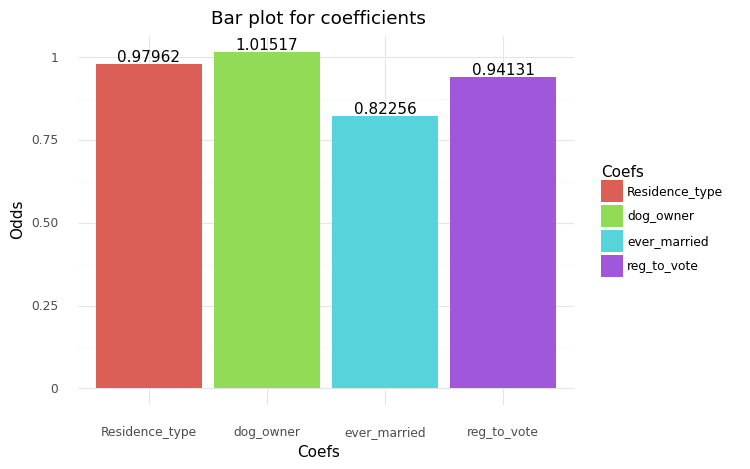

<ggplot: (8790804223429)>

In [ ]:
coefsToPlot = coef.loc[(coef["Coefs"] == "Residence_type") |
                       (coef["Coefs"] == "dog_owner") |
                       (coef["Coefs"] == "ever_married") |
                       (coef["Coefs"] == "reg_to_vote")]
coefsToPlot = np.round(coefsToPlot, decimals=5)
(ggplot(coefsToPlot, aes(x = "Coefs", y= "Odds", fill = "Coefs"))  + geom_bar(stat = "identity") + labs(title = "Bar plot for coefficients")+ theme_minimal() 
+ geom_text(aes(label="Odds"), position=position_dodge(width=0.9), vjust = 'bottom'))

Explaination:

The strongest predictor for predicting a possible stroke is the dog_owner category. The odds for this coefficient is the highest out of all the predictors plotted. The odds for dog_owner indicate that a 1 unit increase in standard deviation means that the likelihood of someone having a stroke is multiplied by ~1.015

**<h2> 5. Create a variable er_visits_per_year that calculates the # of visits to the ER that a person has had per year of life. Store this variable in your data frame (no need to include this variable in the previous logistic regression model). Is the # of ER visits per year different for stroke and non-stroke patients? How can you tell? </h2>**

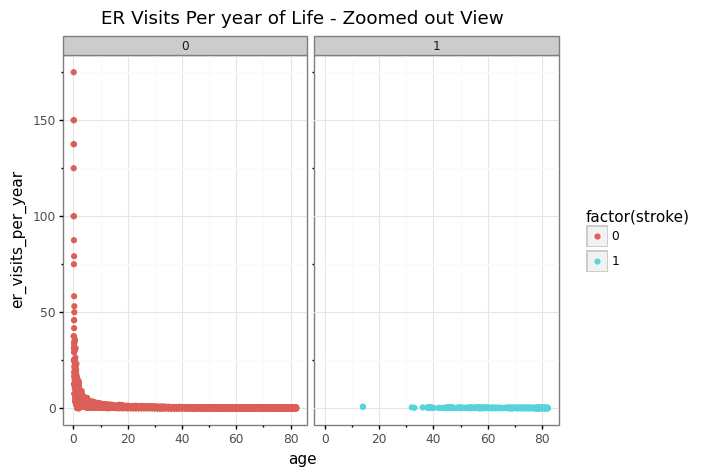

<ggplot: (8790803420217)>


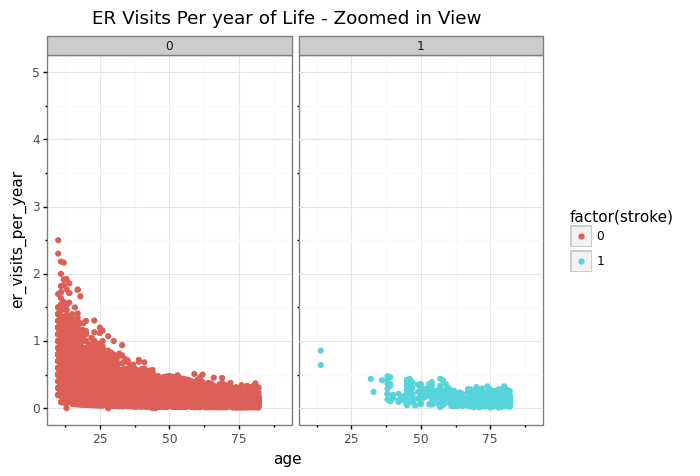

<ggplot: (8790805454113)>


In [ ]:
df["er_visits_per_year"] = df["er_visits"] / df["age"]
print(ggplot(df, aes(x = "age", y = "er_visits_per_year", color = "factor(stroke)")) + geom_point() + facet_wrap("stroke") + theme_bw() + labs(title = "ER Visits Per year of Life - Zoomed out View"))
print(ggplot(df, aes(x = "age", y = "er_visits_per_year", color = "factor(stroke)")) + geom_point() + facet_wrap("stroke") + theme_bw() + ylim(0,5) + xlim(10,90) + labs(title = "ER Visits Per year of Life - Zoomed in View"))

Explaination: 

The first graph is a zoomed out view that holds all the points. To best assess this question the zoomed in graph makes it easier to see the pattern and how ER visits change as they get older. We see that those who didn't have a stroke went to the ER more often than those who did have a stroke. This kind of makes sense because people go to the ER for a variety of things that aren't necessarily stroke related. Futhermore, those who did have a stroke might have more frequent checks to stay on top of the possibility of other stroke related issues as well as making sure they are healthy enough to avoid another stroke. Therefore, the fact that the group that had a stroke went to the ER a lot less than those who didn't indicates that they could be treated differently by doctors as well as lead a lifestyle that avoids situations that might trigger a stroke. Overall, those who didn't have a stroke go to the ER more often than those who did have a stroke.






*Side note: The second graph is zoomed in specifically on the age group 10 and above because the data indicated that not a lot of people under the age of 10 had a stroke and the ER visits for those 10 made a lot more sense than babies. This is because the age of babies was in decmial format (ex: 0.8) which skewed the er_visits_per_year column and we see how that is visualized in the first graph. By zooming in on a specific section we see that the pattern shown in the first graph still holds; however, we can now focus on the group that has actually received a stroke and have er visit values that make much more sense. 